Para esta parte de la practia contamos con una pequeña limitación que es que nuestros archivos están en formato .MP3. Vamos a usar `librosa` para la extracción de características, pero otras librerías como `music21` son tambien muy útiles para obtener datos menos técnicos en archivos MIDI.

In [1]:
import numpy as np
import librosa
import matplotlib
import pandas as pd

print(f"Numpy version: {np.__version__}")
print(f"Librosa version: {librosa.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Pandas version: {pd.__version__}")


Numpy version: 1.26.4
Librosa version: 0.10.2.post1
Matplotlib version: 3.10.0
Pandas version: 2.2.3


In [2]:
audio_prueba = 'data/MEMD_audio/2.mp3'
audio_prueba

'data/MEMD_audio/2.mp3'

Le pedimos a Chatgpt que nos haga una pequeña demostración de qué información podemos sacar para un audio

In [22]:
try:
    # Cargar el archivo de audio
    y, sr = librosa.load(audio_prueba, sr=None)
    print(f"Audio cargado correctamente. Duración: {len(y)/sr:.2f} segundos, Frecuencia de muestreo: {sr} Hz")

    # **1. Características básicas**
    duration = librosa.get_duration(y=y, sr=sr)  # Duración
    rms = librosa.feature.rms(y=y).mean()  # Energía (RMS)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)  # Tempo estimado
    zero_crossings = librosa.feature.zero_crossing_rate(y=y).mean()  # Tasa de cruces por cero

    # **2. MFCCs**
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = mfccs.mean(axis=1)  # Promedio de cada coeficiente MFCC

    # **3. Espectral**
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()  # Centroid espectral
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()  # Ancho de banda espectral
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()  # Rolloff espectral

    # **4. Chroma**
    chroma = librosa.feature.chroma_stft(y=y, sr=sr).mean(axis=1)  # Promedio de cromagramas

    # **5. Consolidar características**
    audio_features = {
        "file_name": audio_prueba,
        "duration": duration,
        "rms_energy": rms,
        "tempo": tempo,
        "zero_crossing_rate": zero_crossings,
        "spectral_centroid": spectral_centroid,
        "spectral_bandwidth": spectral_bandwidth,
        "spectral_rolloff": spectral_rolloff,
        **{f"mfcc_{i+1}": mfcc for i, mfcc in enumerate(mfccs_mean)},
        **{f"chroma_{i+1}": chroma_val for i, chroma_val in enumerate(chroma)},
    }

    # Mostrar las características en formato DataFrame
    df_features = pd.DataFrame([audio_features])
    # print(df_features.T)

except Exception as e:
    print(f"Error al procesar el archivo {audio_prueba}: {e}")


Audio cargado correctamente. Duración: 45.06 segundos, Frecuencia de muestreo: 44100 Hz


In [23]:
y

array([0.        , 0.        , 0.        , ..., 0.3946326 , 0.41406155,
       0.33967352], dtype=float32)

In [24]:
sr

44100

In [21]:
df_features.T

,0
file_name,data/MEMD_audio/2.mp3
duration,45.060998
rms_energy,0.105231
tempo,[139.6748310810811]
zero_crossing_rate,0.036522
spectral_centroid,1894.684236
spectral_bandwidth,2486.199436
spectral_rolloff,3912.602977
mfcc_1,-200.259857
mfcc_2,171.772614


### **Explicación**:

#### **Características Básicas**
1. **`file_name`**:
   - Nombre o ruta del archivo de audio analizado.
   - en este caso, es el archivo `2.mp3`.

2. **`duration`**:
   - Duracion total del archivo de audio en segundos.
   - tiempo: **45.06 segundos**.

3. **`rms_energy`**:
   - energía RMS (Root Mean Square) mide la intensidad promedio del sonido en el tiempo. Se calcula como la raíz cuadrada del promedio de los cuadrados de las amplitudes de la señal.
   - Un valor más alto indica un sonido más fuerte.

4. **`tempo`**:
   - Velocidad del ritmo del audio, expresada en Beats Per Minute (BPM).
   - Valor: **139.67 BPM**, ritmo moderado/rápido.

5. **`zero_crossing_rate`**:
   - Frecuencia con la que la señal de audio cruza el eje cero.
   - Distingue entre sonidos suaves y ruidosos; un valor bajo indica un sonido más suave.


#### **Características Espectrales**
6. **`spectral_centroid`**:
   - Representa el "centro de gravedad" del espectro de frecuencias.
   - Un valor más alto indica un sonido con más frecuencias altas.

7. **`spectral_bandwidth`**:
   - Rango de frecuencias alrededor del centroid espectral.
   - uu valor mayor implica un sonido más complejo o brillante.

8. **`spectral_rolloff`**:
   - Frecuencia por debajo de la cual se concentra el 85% de la energía del espectro.
   - identifica si un sonido es "grave" o "agudo".


#### **MFCCs (Mel Frequency Cepstral Coefficients)**
9. **`mfcc_1` a `mfcc_13`**:
   - Son coeficientes que describen la forma del espectro en la escala de [Mel](https://www.toolify.ai/es/ai-news-es/explicacin-fcil-de-los-espectrogramas-de-mel-2795298).
   - Se utilizan para representar características de timbre:
     - Los primeros coeficientes capturan información general (frecuencias bajas).
     - Los coeficientes más altos capturan detalles más finos.


#### **Chroma Features**
10. **`chroma_1` a `chroma_12`**:
    - Representan la intensidad de cada una de las 12 notas musicales en una octava (C, C#, D, ..., B).
    - Permiten analizar el contenido armónico y tonal del audio.


---
vamos a visualizar algunos graficos sobre el audio

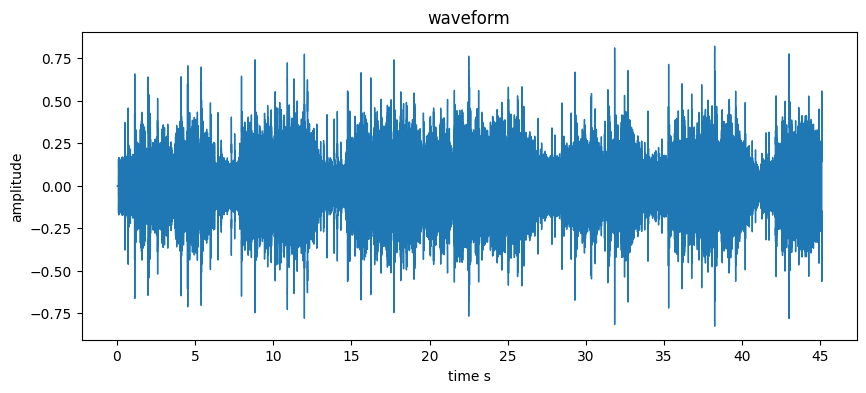

In [26]:
import matplotlib.pyplot as plt
# Forma de onda
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('waveform')
plt.xlabel('time s')
plt.ylabel('amplitude')
plt.show()

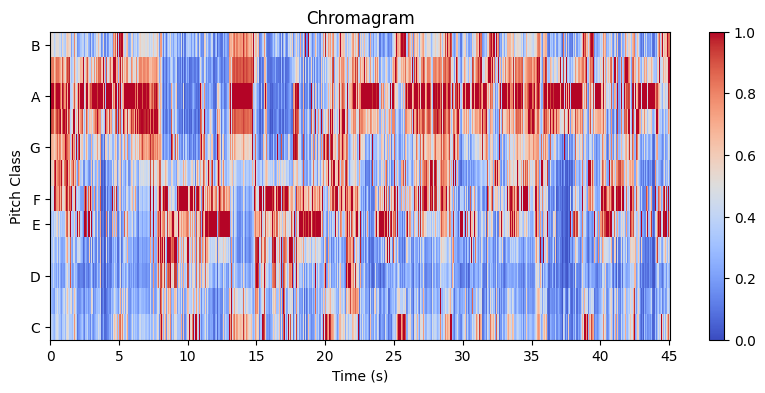

In [28]:
# Cromagrama
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', sr=sr, cmap='coolwarm')
plt.colorbar()
plt.title('Chromagram')
plt.xlabel('Time (s)')
plt.ylabel('Pitch Class')
plt.show()


---

Aplicamos todo lo aprendido de forma general para todos los archivos de la carpeta `MEMD_audio`

In [4]:
valence_df = pd.read_csv("data/valence_arousal/valence.csv")
arousal_df = pd.read_csv("data/valence_arousal/arousal.csv")

In [9]:
unique_song_ids_v = valence_df['song_id'].unique().tolist()
print(unique_song_ids_v)
print(len(unique_song_ids_v))

[2, 3, 4, 5, 7, 8, 10, 12, 13, 17, 18, 19, 20, 21, 22, 24, 25, 31, 32, 35, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 62, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 140, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 250, 

In [10]:
unique_song_ids_a = arousal_df['song_id'].unique().tolist()
print(unique_song_ids_a)
print(len(unique_song_ids_a))

[2, 3, 4, 5, 7, 8, 10, 12, 13, 17, 18, 19, 20, 21, 22, 24, 25, 31, 32, 35, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 62, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 140, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 250, 

In [12]:
unique_song_ids_a == unique_song_ids_v

True

In [36]:
audio_files = {f"audio_{num}": f"data/MEMD_audio/{num}.mp3" for num in unique_song_ids_a}
print(len(audio_files))
audio_files

1802


{'audio_2': 'data/MEMD_audio/2.mp3',
 'audio_3': 'data/MEMD_audio/3.mp3',
 'audio_4': 'data/MEMD_audio/4.mp3',
 'audio_5': 'data/MEMD_audio/5.mp3',
 'audio_7': 'data/MEMD_audio/7.mp3',
 'audio_8': 'data/MEMD_audio/8.mp3',
 'audio_10': 'data/MEMD_audio/10.mp3',
 'audio_12': 'data/MEMD_audio/12.mp3',
 'audio_13': 'data/MEMD_audio/13.mp3',
 'audio_17': 'data/MEMD_audio/17.mp3',
 'audio_18': 'data/MEMD_audio/18.mp3',
 'audio_19': 'data/MEMD_audio/19.mp3',
 'audio_20': 'data/MEMD_audio/20.mp3',
 'audio_21': 'data/MEMD_audio/21.mp3',
 'audio_22': 'data/MEMD_audio/22.mp3',
 'audio_24': 'data/MEMD_audio/24.mp3',
 'audio_25': 'data/MEMD_audio/25.mp3',
 'audio_31': 'data/MEMD_audio/31.mp3',
 'audio_32': 'data/MEMD_audio/32.mp3',
 'audio_35': 'data/MEMD_audio/35.mp3',
 'audio_37': 'data/MEMD_audio/37.mp3',
 'audio_39': 'data/MEMD_audio/39.mp3',
 'audio_40': 'data/MEMD_audio/40.mp3',
 'audio_41': 'data/MEMD_audio/41.mp3',
 'audio_42': 'data/MEMD_audio/42.mp3',
 'audio_43': 'data/MEMD_audio/43.mp3'

In [72]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

In [58]:
audio_files = glob('data/MEMD_audio/*.mp3')
total_files =len(audio_files)
total_files

1802

In [57]:
for file in audio_files:
    file_name = file.split('\\')[-1].split('.')[0]
    print(file)
    print(file_name)

data/MEMD_audio\10.mp3
10
data/MEMD_audio\1000.mp3
1000
data/MEMD_audio\1001.mp3
1001
data/MEMD_audio\1002.mp3
1002
data/MEMD_audio\1003.mp3
1003
data/MEMD_audio\1004.mp3
1004
data/MEMD_audio\1005.mp3
1005
data/MEMD_audio\1006.mp3
1006
data/MEMD_audio\1007.mp3
1007
data/MEMD_audio\1008.mp3
1008
data/MEMD_audio\1009.mp3
1009
data/MEMD_audio\101.mp3
101
data/MEMD_audio\1010.mp3
1010
data/MEMD_audio\1011.mp3
1011
data/MEMD_audio\1012.mp3
1012
data/MEMD_audio\1013.mp3
1013
data/MEMD_audio\1014.mp3
1014
data/MEMD_audio\1015.mp3
1015
data/MEMD_audio\1016.mp3
1016
data/MEMD_audio\1017.mp3
1017
data/MEMD_audio\1018.mp3
1018
data/MEMD_audio\1019.mp3
1019
data/MEMD_audio\102.mp3
102
data/MEMD_audio\1020.mp3
1020
data/MEMD_audio\1021.mp3
1021
data/MEMD_audio\1022.mp3
1022
data/MEMD_audio\1023.mp3
1023
data/MEMD_audio\1024.mp3
1024
data/MEMD_audio\1025.mp3
1025
data/MEMD_audio\1026.mp3
1026
data/MEMD_audio\1027.mp3
1027
data/MEMD_audio\1028.mp3
1028
data/MEMD_audio\1029.mp3
1029
data/MEMD_audio\10

In [50]:
chunk_audio_files = audio_files[0:5]
chunk_audio_files

['data/MEMD_audio\\10.mp3',
 'data/MEMD_audio\\1000.mp3',
 'data/MEMD_audio\\1001.mp3',
 'data/MEMD_audio\\1002.mp3',
 'data/MEMD_audio\\1003.mp3']

In [62]:
audio_features = []

for idx, file in enumerate(audio_files, start=1):    
    try:
    
        file_name = file.split('\\')[-1].split('.')[0]
        print(f"processing file {file_name}, number {idx} de {total_files}")

        y, sr = librosa.load(file, sr=None)

        #relevat features for our model
        duration = librosa.get_duration(y=y, sr=sr)
        rms_energy = librosa.feature.rms(y=y).mean()
        tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y).mean()
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
        spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs_mean = mfccs.mean(axis=1) 

        # save features in a dict 
        features = {
            'file_name': file_name,
            'duration': duration,
            'rms_energy': rms_energy,
            'tempo': tempo,
            'zero_crossing_rate': zero_crossing_rate,
            'spectral_centroid': spectral_centroid,
            'spectral_bandwidth': spectral_bandwidth,
            'spectral_rolloff': spectral_rolloff,
        }

        #add mfcc coeffficients 
        for i, mfcc in enumerate(mfccs_mean, start=1):
            features[f'mfcc_{i}'] = mfcc

        audio_features.append(features)

    except Exception as e:
        print(f"Error al procesar {file}: {e}")



processing file 10, number 1 de 1802
processing file 1000, number 2 de 1802
processing file 1001, number 3 de 1802
processing file 1002, number 4 de 1802
processing file 1003, number 5 de 1802
processing file 1004, number 6 de 1802
processing file 1005, number 7 de 1802
processing file 1006, number 8 de 1802
processing file 1007, number 9 de 1802
processing file 1008, number 10 de 1802
processing file 1009, number 11 de 1802
processing file 101, number 12 de 1802
processing file 1010, number 13 de 1802
processing file 1011, number 14 de 1802
processing file 1012, number 15 de 1802
processing file 1013, number 16 de 1802
processing file 1014, number 17 de 1802
processing file 1015, number 18 de 1802
processing file 1016, number 19 de 1802
processing file 1017, number 20 de 1802
processing file 1018, number 21 de 1802
processing file 1019, number 22 de 1802
processing file 102, number 23 de 1802
processing file 1020, number 24 de 1802
processing file 1021, number 25 de 1802
processing fi

In [84]:
df = pd.DataFrame(audio_features)
df.to_csv('data/audio_features.csv', index=False)

In [85]:
df.dtypes

file_name              object
duration              float64
rms_energy            float32
tempo                  object
zero_crossing_rate    float64
spectral_centroid     float64
spectral_bandwidth    float64
spectral_rolloff      float64
mfcc_1                float32
mfcc_2                float32
mfcc_3                float32
mfcc_4                float32
mfcc_5                float32
mfcc_6                float32
mfcc_7                float32
mfcc_8                float32
mfcc_9                float32
mfcc_10               float32
mfcc_11               float32
mfcc_12               float32
mfcc_13               float32
dtype: object

In [86]:
df['file_name'] = df['file_name'].astype(int)

In [87]:
df.dtypes

file_name               int32
duration              float64
rms_energy            float32
tempo                  object
zero_crossing_rate    float64
spectral_centroid     float64
spectral_bandwidth    float64
spectral_rolloff      float64
mfcc_1                float32
mfcc_2                float32
mfcc_3                float32
mfcc_4                float32
mfcc_5                float32
mfcc_6                float32
mfcc_7                float32
mfcc_8                float32
mfcc_9                float32
mfcc_10               float32
mfcc_11               float32
mfcc_12               float32
mfcc_13               float32
dtype: object

In [88]:
df = df.sort_values(by='file_name', ascending=True)

In [89]:
df.reset_index(drop=True, inplace=True)

In [90]:
df

,file_name,duration,rms_energy,tempo,zero_crossing_rate,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,2,45.060998,0.105231,[139.6748310810811],0.036522,1894.684236,2486.199436,3912.602977,-200.259857,171.772614,-32.708050,36.403446,0.236144,17.683105,1.365153,9.277338,1.370862,-3.264254,6.485454,1.080217,-1.031337
1,3,45.034875,0.116200,[95.703125],0.013482,1043.167353,1909.448198,2180.582380,-285.926178,159.132568,7.611665,33.757629,25.207741,20.010067,18.247145,21.900534,11.854753,10.960750,9.535206,7.900679,2.072755
2,4,45.034875,0.184904,[84.72079918032787],0.037387,1917.091287,2596.755681,3948.575488,-163.723801,166.300110,-29.482483,36.676277,10.505774,39.914688,-2.767269,7.671440,-2.185159,2.389242,-0.667877,0.583180,0.228795
3,5,45.034875,0.149748,[123.046875],0.036256,1898.303391,2731.843915,3771.885536,-190.341141,162.434845,-10.739488,38.936256,-6.951975,10.322243,-25.887856,6.754761,-14.676446,-6.158040,-7.251907,-13.481309,-1.855042
4,7,45.060998,0.267147,[120.18531976744185],0.012908,1269.457957,2229.921617,2820.644373,-208.911133,156.988312,-2.480501,62.610767,13.259298,27.919954,20.397331,12.311554,10.173452,2.516552,0.894844,-1.296418,3.176229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,2054,95.555918,0.113068,[184.5703125],0.014080,609.154432,1049.450390,951.290923,-345.003265,170.278488,32.800442,29.274414,42.960831,13.713198,7.100956,9.439139,-5.665821,-8.279132,-1.064173,-3.373265,-2.839869
1798,2055,283.846531,0.162186,[123.046875],0.075789,3022.224838,3079.615902,6087.714573,-158.860275,125.534889,-23.853182,49.987499,-8.285833,20.021326,-10.491330,9.692228,-1.173238,4.142817,-2.555365,8.149619,2.640244
1799,2056,167.993469,0.082061,[99.38401442307692],0.032717,1718.402948,2496.094006,3180.802323,-275.038208,162.403717,-6.042139,31.144011,8.626746,3.782925,5.743162,7.962147,-0.317671,4.725707,-5.704327,1.246315,-1.315412
1800,2057,183.013878,0.174957,[126.04801829268293],0.064016,2849.405262,3230.593970,5976.757444,-117.862534,144.675659,-37.273106,52.916336,-2.505956,30.558453,-15.577179,18.441471,-5.380016,9.218659,-0.420411,-0.137583,-5.812217


In [91]:
df['tempo'].apply(type).value_counts()


tempo
<class 'numpy.ndarray'>    1801
<class 'float'>               1
Name: count, dtype: int64

In [92]:
float_value = df.loc[df['tempo'].apply(type) == float, 'tempo']
print(float_value)


395    0.0
Name: tempo, dtype: object


In [93]:
df[df.index == 395]

,file_name,duration,rms_energy,tempo,zero_crossing_rate,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
395,480,45.034875,0.101072,0.0,0.008446,324.878042,513.634078,501.242342,-390.151947,178.652802,81.652802,15.569333,5.942239,18.056334,18.872728,9.683338,4.298912,5.112299,6.707789,6.69227,5.457592


In [94]:
df['tempo'] = df['tempo'].apply(lambda x: x[0] if isinstance(x, (np.ndarray, list)) and len(x) > 0 else 0.0)

In [96]:
df.dtypes

file_name               int32
duration              float64
rms_energy            float32
tempo                 float64
zero_crossing_rate    float64
spectral_centroid     float64
spectral_bandwidth    float64
spectral_rolloff      float64
mfcc_1                float32
mfcc_2                float32
mfcc_3                float32
mfcc_4                float32
mfcc_5                float32
mfcc_6                float32
mfcc_7                float32
mfcc_8                float32
mfcc_9                float32
mfcc_10               float32
mfcc_11               float32
mfcc_12               float32
mfcc_13               float32
dtype: object

In [97]:
df['tempo'].apply(type).value_counts()

tempo
<class 'float'>    1802
Name: count, dtype: int64

In [95]:
df

,file_name,duration,rms_energy,tempo,zero_crossing_rate,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13
0,2,45.060998,0.105231,139.674831,0.036522,1894.684236,2486.199436,3912.602977,-200.259857,171.772614,-32.708050,36.403446,0.236144,17.683105,1.365153,9.277338,1.370862,-3.264254,6.485454,1.080217,-1.031337
1,3,45.034875,0.116200,95.703125,0.013482,1043.167353,1909.448198,2180.582380,-285.926178,159.132568,7.611665,33.757629,25.207741,20.010067,18.247145,21.900534,11.854753,10.960750,9.535206,7.900679,2.072755
2,4,45.034875,0.184904,84.720799,0.037387,1917.091287,2596.755681,3948.575488,-163.723801,166.300110,-29.482483,36.676277,10.505774,39.914688,-2.767269,7.671440,-2.185159,2.389242,-0.667877,0.583180,0.228795
3,5,45.034875,0.149748,123.046875,0.036256,1898.303391,2731.843915,3771.885536,-190.341141,162.434845,-10.739488,38.936256,-6.951975,10.322243,-25.887856,6.754761,-14.676446,-6.158040,-7.251907,-13.481309,-1.855042
4,7,45.060998,0.267147,120.185320,0.012908,1269.457957,2229.921617,2820.644373,-208.911133,156.988312,-2.480501,62.610767,13.259298,27.919954,20.397331,12.311554,10.173452,2.516552,0.894844,-1.296418,3.176229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,2054,95.555918,0.113068,184.570312,0.014080,609.154432,1049.450390,951.290923,-345.003265,170.278488,32.800442,29.274414,42.960831,13.713198,7.100956,9.439139,-5.665821,-8.279132,-1.064173,-3.373265,-2.839869
1798,2055,283.846531,0.162186,123.046875,0.075789,3022.224838,3079.615902,6087.714573,-158.860275,125.534889,-23.853182,49.987499,-8.285833,20.021326,-10.491330,9.692228,-1.173238,4.142817,-2.555365,8.149619,2.640244
1799,2056,167.993469,0.082061,99.384014,0.032717,1718.402948,2496.094006,3180.802323,-275.038208,162.403717,-6.042139,31.144011,8.626746,3.782925,5.743162,7.962147,-0.317671,4.725707,-5.704327,1.246315,-1.315412
1800,2057,183.013878,0.174957,126.048018,0.064016,2849.405262,3230.593970,5976.757444,-117.862534,144.675659,-37.273106,52.916336,-2.505956,30.558453,-15.577179,18.441471,-5.380016,9.218659,-0.420411,-0.137583,-5.812217


In [98]:
df.to_csv('data/audio_features.csv', index=False)